

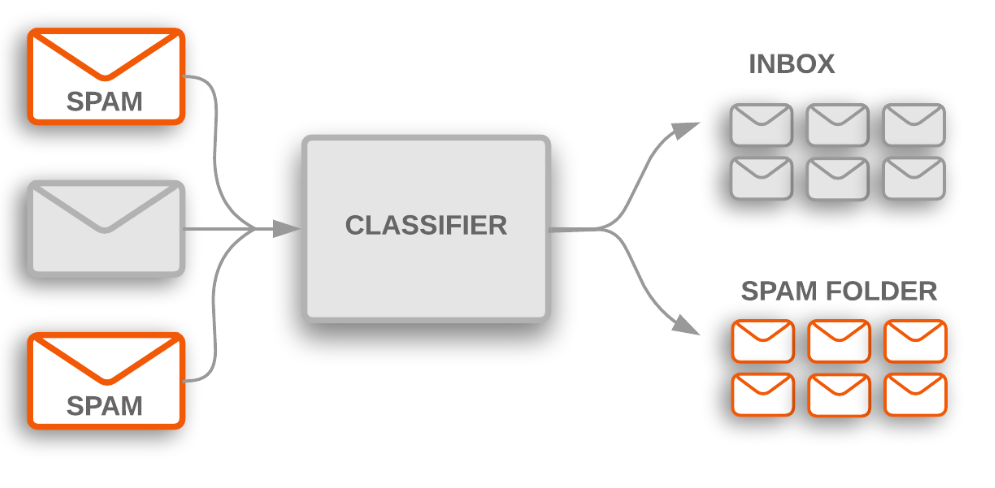
photo_credit: Syabaruddin Malik

## **What will be covered by today:**
   * Our project is spam classfication
   * Text preprocessing -> Tokenization, stopwords,steamming, lemmatization by the help of NLTK
   * Text -> Vectors: By using BOW, TFIDF, Word2Vec, AvgWord2Vec.
   
    

In [1]:
# importing the Dataset

import pandas as pd

messages = pd.read_csv('/kaggle/input/sms-spam-collection/SMSSpamCollection', sep='\t',
                           names=["label", "message"]) #label is the output and message is the input of entire dataset

In [2]:
#check message shape
messages.shape #5572 total number of rows, 2 is the total number of columns or features

(5572, 2)

Based on the problem statement we need to convert text to vector

In [3]:
#view the dataset
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
messages['message'].loc[451] #451 nhumber index

'hanks lotsly!'

## **Data cleaning and Preprocessing**

In [5]:
#import library
import re #regular expression
import nltk
nltk.download('stopwords')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # PorterStemmer is for stemming purpose
ps = PorterStemmer()

In [7]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z0-9]', ' ', messages['message'][i]) #remove all of the special character other than a-z A-Z 0-9
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
#view the corpos
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

# **Apply Bag of words for convert text into vectors**

In [9]:
# Creating the Bag of Words model
#link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500, binary =True, ngram_range=(2,2)) #binary will take the value between 0 to 1, top max_features 2500 means top 2500 most occuring feature it will take
X = cv.fit_transform(corpus).toarray() 

In [10]:
#now the shape feature have changed from 2 to 2500
X.shape

(5572, 2500)

In [11]:
X #bag of wrods have created

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
X[2] #that is created in sentence 2

array([0, 0, 0, ..., 0, 0, 0])

### **Apply Label encoder on y**

In [13]:
#Make sure the y feature will be spam and ham
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [14]:
#show y values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

### **Train Test Split**

In [15]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [16]:
#check x_train and y_train
X_train, y_train #input, output

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([0, 0, 0, ..., 1, 0, 0], dtype=uint8))

In [17]:
# apply MultinomialNB and fit it
#source: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
    
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [18]:
#prediction
y_pred=spam_detect_model.predict(X_test)

In [19]:
#source: https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import accuracy_score,classification_report

In [20]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9721973094170404


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       986
           1       0.81      1.00      0.89       129

    accuracy                           0.97      1115
   macro avg       0.90      0.98      0.94      1115
weighted avg       0.98      0.97      0.97      1115



# TERM FREQUENCY- INVERSE DOCUMENT FREQUENCY(TFIDF)

In [22]:
# Creating the TFIDF model
#source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500, ngram_range=(1,2))
X = tv.fit_transform(corpus).toarray()

In [23]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [24]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [25]:
#prediction
y_pred=spam_detect_model.predict(X_test)

In [26]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9811659192825112


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       976
           1       0.87      1.00      0.93       139

    accuracy                           0.98      1115
   macro avg       0.93      0.99      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [28]:
#apply randomforest classifier
#source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred =classifier.predict(X_test)

In [30]:
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.9829596412556054
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       974
           1       0.88      1.00      0.94       141

    accuracy                           0.98      1115
   macro avg       0.94      0.99      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# WORD2VEC IMPLEMENTATION
* word2Vec have two types:
 * 1.skipgram 
 * 2.CBOW
 
* Word2Vec: 
 * (1) Pretrained Model(google news 300) 
 * (2) Train this model (from scratch)


word2vec convert fix size of vector. if google news will be 300 word2vec model means every model of word2vec have three hundred(300) dimensions. Like King word will be 300 dimensions, queen have the another word so it will also carry 300 dimension. 

**Questions:** But if we fix this problem and make our whole sentence, not separate words into 300 dimension, then what should we have to do. 

 **Answer:** We need to apply AvgWord2Vec where they will take all of the words separately and calculate the average.

**credit: source:**
https://yaronvazana.com/2018/09/20/average-word-vectors-generate-document-paragraph-sentence-embeddings/
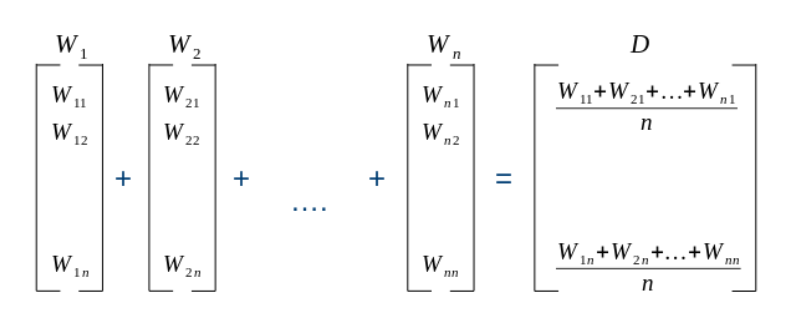




In [31]:
!pip install gensim

In [32]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [33]:
vec_king = wv['king']

In [34]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [35]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:

""""
#import lemmatizer
from nltk.stem import WordNetLemmatizer
lt=WordNetLemmatizer()"""

'"\n#import lemmatizer\nfrom nltk.stem import WordNetLemmatizer\nlt=WordNetLemmatizer()'

In [37]:

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # PorterStemmer is for stemming purpose
ps = PorterStemmer()


In [38]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z0-9]', ' ', messages['message'][i]) #remove all of the special character other than a-z A-Z 0-9
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [39]:
""""
#lemmatize words
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [lt.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    """

'"\n#lemmatize words\ncorpus = []\nfor i in range(0, len(messages)):\n    review = re.sub(\'[^a-zA-Z]\', \' \', messages[\'message\'][i])\n    review = review.lower()\n    review = review.split()\n    \n    review = [lt.lemmatize(word) for word in review if not word in stopwords.words(\'english\')]\n    review = \' \'.join(review)\n    corpus.append(review)\n    '

In [40]:
#source of sent_tokenize:https://www.nltk.org/api/nltk.tokenize.html
#source of simple_preprocess: https://tedboy.github.io/nlps/generated/generated/gensim.utils.simple_preprocess.html
from nltk import sent_tokenize #sent_tokeize text split into sentences
from gensim.utils import simple_preprocess #convert documents into list of tokens 

In [41]:
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [42]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent) #convert text into sentences
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [43]:
words

[['go',
  'jurong',
  'point',
  'crazi',
  'avail',
  'bugi',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amor',
  'wat'],
 ['ok', 'lar', 'joke', 'wif', 'oni'],
 ['free',
  'entri',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  'st',
  'may',
  'text',
  'fa',
  'receiv',
  'entri',
  'question',
  'std',
  'txt',
  'rate',
  'appli',
  'over'],
 ['dun', 'say', 'earli', 'hor', 'alreadi', 'say'],
 ['nah', 'think', 'goe', 'usf', 'live', 'around', 'though'],
 ['freemsg',
  'hey',
  'darl',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chg',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'mell',
  'mell',
  'oru',
  'minnaminungint',
  'nurungu',
  'vettam',
  'set',
  'callertun',
  'caller',
  'press',
  'copi',
  'friend',
  'callertun'],
 ['winner',
  'valu',
  'network',
  'custom',
  'select',
  'receivea',
  'prize',
  'r

In [44]:
import gensim

In [45]:
### Lets train Word2vec from scratch
model=gensim.models.Word2Vec(words,window=5,min_count=2) #window how many context on the left and right side
#


In [46]:
model.wv.index_to_key # all the vocabulary

['call',
 'go',
 'get',
 'ur',
 'gt',
 'lt',
 'come',
 'day',
 'ok',
 'free',
 'know',
 'love',
 'like',
 'time',
 'want',
 'good',
 'got',
 'text',
 'send',
 'txt',
 'need',
 'one',
 'today',
 'take',
 'stop',
 'see',
 'home',
 'think',
 'repli',
 'lor',
 'sorri',
 'still',
 'tell',
 'mobil',
 'back',
 'da',
 'dont',
 'make',
 'phone',
 'pleas',
 'week',
 'hi',
 'say',
 'new',
 'work',
 'pl',
 'later',
 'miss',
 'hope',
 'ask',
 'co',
 'msg',
 'min',
 'meet',
 'messag',
 'dear',
 'night',
 'wait',
 'happi',
 'well',
 'give',
 'tri',
 'thing',
 'much',
 'great',
 'oh',
 'claim',
 'wat',
 'hey',
 'number',
 'friend',
 'thank',
 'ye',
 'way',
 'www',
 'prize',
 'let',
 'feel',
 'right',
 'even',
 'tomorrow',
 'win',
 'pick',
 'alreadi',
 'care',
 'cash',
 'said',
 'amp',
 'im',
 'leav',
 'yeah',
 'tone',
 'realli',
 'find',
 'babe',
 'life',
 'morn',
 'sleep',
 'last',
 'uk',
 'servic',
 'keep',
 'year',
 'sure',
 'nokia',
 'com',
 'would',
 'buy',
 'use',
 'anyth',
 'contact',
 'start',

In [47]:
#count the vocabulary size
model.corpus_count

5565

In [48]:
#how many epochs
model.epochs

5

In [49]:
#find out the kid similar word
model.wv.similar_by_word('kid')

[('go', 0.9978830218315125),
 ('actual', 0.9978025555610657),
 ('think', 0.9977991580963135),
 ('great', 0.9977984428405762),
 ('eat', 0.9977927803993225),
 ('ever', 0.9977916479110718),
 ('told', 0.9977831840515137),
 ('drink', 0.9977788925170898),
 ('amp', 0.997778594493866),
 ('alway', 0.9977783560752869)]

In [50]:
model.wv['kid'].shape

(100,)

In [51]:
import numpy as np

In [52]:
def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)
    
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)
        
    
    

In [53]:
!pip install tqdm

In [54]:
# tqdm provides a fast and extensible way to display progress bars in loops or operations that take a significant amount of time
from tqdm import tqdm

In [55]:
words[73]

['perform']

In [56]:
type(model.wv.index_to_key)

list

In [57]:
words

[['go',
  'jurong',
  'point',
  'crazi',
  'avail',
  'bugi',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amor',
  'wat'],
 ['ok', 'lar', 'joke', 'wif', 'oni'],
 ['free',
  'entri',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  'st',
  'may',
  'text',
  'fa',
  'receiv',
  'entri',
  'question',
  'std',
  'txt',
  'rate',
  'appli',
  'over'],
 ['dun', 'say', 'earli', 'hor', 'alreadi', 'say'],
 ['nah', 'think', 'goe', 'usf', 'live', 'around', 'though'],
 ['freemsg',
  'hey',
  'darl',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chg',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'mell',
  'mell',
  'oru',
  'minnaminungint',
  'nurungu',
  'vettam',
  'set',
  'callertun',
  'caller',
  'press',
  'copi',
  'friend',
  'callertun'],
 ['winner',
  'valu',
  'network',
  'custom',
  'select',
  'receivea',
  'prize',
  'r

In [58]:
#apply for the entire sentences
X=[]
for i in tqdm(range(len(words))):
    print("Hello",i)
    X.append(avg_word2vec(words[i]))

    

  0%|          | 0/5565 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 22%|██▏       | 1230/5565 [00:00<00:00, 6146.43it/s]

Hello 0
Hello 1
Hello 2
Hello 3
Hello 4
Hello 5
Hello 6
Hello 7
Hello 8
Hello 9
Hello 10
Hello 11
Hello 12
Hello 13
Hello 14
Hello 15
Hello 16
Hello 17
Hello 18
Hello 19
Hello 20
Hello 21
Hello 22
Hello 23
Hello 24
Hello 25
Hello 26
Hello 27
Hello 28
Hello 29
Hello 30
Hello 31
Hello 32
Hello 33
Hello 34
Hello 35
Hello 36
Hello 37
Hello 38
Hello 39
Hello 40
Hello 41
Hello 42
Hello 43
Hello 44
Hello 45
Hello 46
Hello 47
Hello 48
Hello 49
Hello 50
Hello 51
Hello 52
Hello 53
Hello 54
Hello 55
Hello 56
Hello 57
Hello 58
Hello 59
Hello 60
Hello 61
Hello 62
Hello 63
Hello 64
Hello 65
Hello 66
Hello 67
Hello 68
Hello 69
Hello 70
Hello 71
Hello 72
Hello 73
Hello 74
Hello 75
Hello 76
Hello 77
Hello 78
Hello 79
Hello 80
Hello 81
Hello 82
Hello 83
Hello 84
Hello 85
Hello 86
Hello 87
Hello 88
Hello 89
Hello 90
Hello 91
Hello 92
Hello 93
Hello 94
Hello 95
Hello 96
Hello 97
Hello 98
Hello 99
Hello 100
Hello 101
Hello 102
Hello 103
Hello 104
Hello 105
Hello 106
Hello 107
Hello 108
Hello 109
Hello 110


 33%|███▎      | 1845/5565 [00:00<00:00, 5558.24it/s]

Hello 1265
Hello 1266
Hello 1267
Hello 1268
Hello 1269
Hello 1270
Hello 1271
Hello 1272
Hello 1273
Hello 1274
Hello 1275
Hello 1276
Hello 1277
Hello 1278
Hello 1279
Hello 1280
Hello 1281
Hello 1282
Hello 1283
Hello 1284
Hello 1285
Hello 1286
Hello 1287
Hello 1288
Hello 1289
Hello 1290
Hello 1291
Hello 1292
Hello 1293
Hello 1294
Hello 1295
Hello 1296
Hello 1297
Hello 1298
Hello 1299
Hello 1300
Hello 1301
Hello 1302
Hello 1303
Hello 1304
Hello 1305
Hello 1306
Hello 1307
Hello 1308
Hello 1309
Hello 1310
Hello 1311
Hello 1312
Hello 1313
Hello 1314
Hello 1315
Hello 1316
Hello 1317
Hello 1318
Hello 1319
Hello 1320
Hello 1321
Hello 1322
Hello 1323
Hello 1324
Hello 1325
Hello 1326
Hello 1327
Hello 1328
Hello 1329
Hello 1330
Hello 1331
Hello 1332
Hello 1333
Hello 1334
Hello 1335
Hello 1336
Hello 1337
Hello 1338
Hello 1339
Hello 1340
Hello 1341
Hello 1342
Hello 1343
Hello 1344
Hello 1345
Hello 1346
Hello 1347
Hello 1348
Hello 1349
Hello 1350
Hello 1351
Hello 1352
Hello 1353
Hello 1354
Hello 1355

 54%|█████▍    | 2993/5565 [00:00<00:00, 5648.57it/s]

Hello 2369
Hello 2370
Hello 2371
Hello 2372
Hello 2373
Hello 2374
Hello 2375
Hello 2376
Hello 2377
Hello 2378
Hello 2379
Hello 2380
Hello 2381
Hello 2382
Hello 2383
Hello 2384
Hello 2385
Hello 2386
Hello 2387
Hello 2388
Hello 2389
Hello 2390
Hello 2391
Hello 2392
Hello 2393
Hello 2394
Hello 2395
Hello 2396
Hello 2397
Hello 2398
Hello 2399
Hello 2400
Hello 2401
Hello 2402
Hello 2403
Hello 2404
Hello 2405
Hello 2406
Hello 2407
Hello 2408
Hello 2409
Hello 2410
Hello 2411
Hello 2412
Hello 2413
Hello 2414
Hello 2415
Hello 2416
Hello 2417
Hello 2418
Hello 2419
Hello 2420
Hello 2421
Hello 2422
Hello 2423
Hello 2424
Hello 2425
Hello 2426
Hello 2427
Hello 2428
Hello 2429
Hello 2430
Hello 2431
Hello 2432
Hello 2433
Hello 2434
Hello 2435
Hello 2436
Hello 2437
Hello 2438
Hello 2439
Hello 2440
Hello 2441
Hello 2442
Hello 2443
Hello 2444
Hello 2445
Hello 2446
Hello 2447
Hello 2448
Hello 2449
Hello 2450
Hello 2451
Hello 2452
Hello 2453
Hello 2454
Hello 2455
Hello 2456
Hello 2457
Hello 2458
Hello 2459

 75%|███████▍  | 4161/5565 [00:00<00:00, 5654.30it/s]

Hello 3556
Hello 3557
Hello 3558
Hello 3559
Hello 3560
Hello 3561
Hello 3562
Hello 3563
Hello 3564
Hello 3565
Hello 3566
Hello 3567
Hello 3568
Hello 3569
Hello 3570
Hello 3571
Hello 3572
Hello 3573
Hello 3574
Hello 3575
Hello 3576
Hello 3577
Hello 3578
Hello 3579
Hello 3580
Hello 3581
Hello 3582
Hello 3583
Hello 3584
Hello 3585
Hello 3586
Hello 3587
Hello 3588
Hello 3589
Hello 3590
Hello 3591
Hello 3592
Hello 3593
Hello 3594
Hello 3595
Hello 3596
Hello 3597
Hello 3598
Hello 3599
Hello 3600
Hello 3601
Hello 3602
Hello 3603
Hello 3604
Hello 3605
Hello 3606
Hello 3607
Hello 3608
Hello 3609
Hello 3610
Hello 3611
Hello 3612
Hello 3613
Hello 3614
Hello 3615
Hello 3616
Hello 3617
Hello 3618
Hello 3619
Hello 3620
Hello 3621
Hello 3622
Hello 3623
Hello 3624
Hello 3625
Hello 3626
Hello 3627
Hello 3628
Hello 3629
Hello 3630
Hello 3631
Hello 3632
Hello 3633
Hello 3634
Hello 3635
Hello 3636
Hello 3637
Hello 3638
Hello 3639
Hello 3640
Hello 3641
Hello 3642
Hello 3643
Hello 3644
Hello 3645
Hello 3646

100%|██████████| 5565/5565 [00:00<00:00, 5697.45it/s]

Hello 4690
Hello 4691
Hello 4692
Hello 4693
Hello 4694
Hello 4695
Hello 4696
Hello 4697
Hello 4698
Hello 4699
Hello 4700
Hello 4701
Hello 4702
Hello 4703
Hello 4704
Hello 4705
Hello 4706
Hello 4707
Hello 4708
Hello 4709
Hello 4710
Hello 4711
Hello 4712
Hello 4713
Hello 4714
Hello 4715
Hello 4716
Hello 4717
Hello 4718
Hello 4719
Hello 4720
Hello 4721
Hello 4722
Hello 4723
Hello 4724
Hello 4725
Hello 4726
Hello 4727
Hello 4728
Hello 4729
Hello 4730
Hello 4731
Hello 4732
Hello 4733
Hello 4734
Hello 4735
Hello 4736
Hello 4737
Hello 4738
Hello 4739
Hello 4740
Hello 4741
Hello 4742
Hello 4743
Hello 4744
Hello 4745
Hello 4746
Hello 4747
Hello 4748
Hello 4749
Hello 4750
Hello 4751
Hello 4752
Hello 4753
Hello 4754
Hello 4755
Hello 4756
Hello 4757
Hello 4758
Hello 4759
Hello 4760
Hello 4761
Hello 4762
Hello 4763
Hello 4764
Hello 4765
Hello 4766
Hello 4767
Hello 4768
Hello 4769
Hello 4770
Hello 4771
Hello 4772
Hello 4773
Hello 4774
Hello 4775
Hello 4776
Hello 4777
Hello 4778
Hello 4779
Hello 4780

In [59]:
type(X)

list

In [60]:
X_new=np.array(X)

/tmp/ipykernel_23/3504696623.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_new=np.array(X)


In [61]:
X_new[3]

array([-0.3167089 ,  0.2997193 ,  0.06863254,  0.04342768,  0.09009738,
       -0.49192142,  0.13583747,  0.7200752 , -0.05454057, -0.1831771 ,
       -0.16970927, -0.35060656, -0.1356311 ,  0.05870187,  0.16744292,
       -0.25378737,  0.06296371, -0.41943488,  0.02506554, -0.54912996,
        0.19162746,  0.2772855 ,  0.08682615, -0.12052822, -0.11245968,
        0.07421511, -0.2401749 , -0.31004146, -0.20912366,  0.13925545,
        0.3441681 ,  0.05752745,  0.10393532, -0.18477833, -0.23733658,
        0.4485264 , -0.00546973, -0.3009729 , -0.18582125, -0.5504102 ,
        0.05232694, -0.30428156, -0.0997127 , -0.00162817,  0.27114257,
       -0.11857647, -0.29371187, -0.119805  ,  0.16457292,  0.25623333,
        0.19129597, -0.38352552, -0.0971631 , -0.01717968, -0.18024893,
        0.19977593,  0.21798365,  0.07145217, -0.29993588,  0.05663857,
        0.0675866 ,  0.1478415 , -0.00685614, -0.0389762 , -0.4395025 ,
        0.18074173,  0.1186186 ,  0.22573997, -0.33675846,  0.22

In [62]:
X_new= np.array(X)

/tmp/ipykernel_23/4108130596.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_new= np.array(X)


In [63]:
X_new[0]

array([-0.25301367,  0.2422815 ,  0.05976474,  0.04357402,  0.07343211,
       -0.39707735,  0.10944611,  0.5802005 , -0.05491134, -0.15273353,
       -0.13685486, -0.2840107 , -0.10725092,  0.056086  ,  0.13545112,
       -0.19704555,  0.05177762, -0.33590218,  0.01875308, -0.4458489 ,
        0.15405269,  0.2269572 ,  0.06462784, -0.09111606, -0.08807105,
        0.06508263, -0.19264288, -0.25180516, -0.1689759 ,  0.11502245,
        0.2773468 ,  0.0470203 ,  0.085913  , -0.14543784, -0.19127484,
        0.3660783 ,  0.00259545, -0.24256259, -0.1535434 , -0.4426037 ,
        0.04201837, -0.24634148, -0.08293945,  0.00211981,  0.2226019 ,
       -0.0927703 , -0.23257269, -0.10225394,  0.13174076,  0.20219873,
        0.15273695, -0.30513912, -0.07903099, -0.0162916 , -0.13928224,
        0.15950954,  0.17379677,  0.05886269, -0.24344839,  0.0473464 ,
        0.05240665,  0.12101766, -0.00915312, -0.02781182, -0.35349718,
        0.14819099,  0.09885961,  0.18153091, -0.26553902,  0.18

In [64]:
X_new.shape

(5565,)